# 1. DATASET

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re #regular exprexssion
import nltk #natural language toolkit

# Reading excel file

In [2]:
df = pd.read_excel('LabeledText.xlsx')
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


# Null values

In [3]:
df.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


# Drop neutral label

In [5]:
drop_neutral = df[df['LABEL']=='neutral'].index
df.drop(drop_neutral, inplace=True)

# Label +ve as 1 & -ve as 0

In [6]:
df.loc[df['LABEL']=='negative','LABEL'] = 0 #access values by labels
df.loc[df['LABEL']=='positive','LABEL'] = 1

In [7]:
df['LABEL'].value_counts()

1    1646
0    1452
Name: LABEL, dtype: int64

# Change type 

In [8]:
df = df.astype({'LABEL':int})

# Plotting graph

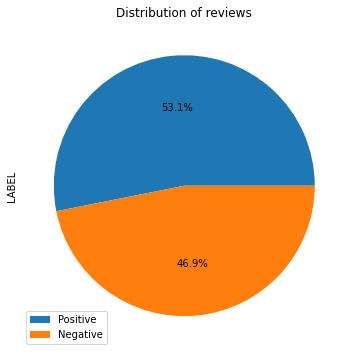

In [9]:
df['LABEL'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews",labels=['',''],autopct='%1.1f%%')
labels=['Positive','Negative']
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

# 2. DATA PRE-PROCESSING

# Cleaning data

In [10]:
def remove(tweet):
    
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet) #mention
    tweet = re.sub(r'\$\w*', '', tweet) #stock market ticket
    tweet = re.sub(r'^RT[\s]+', '', tweet) #old style retweet text RT
    tweet = re.sub(r'^rt[\s]+', '', tweet) #old style retweet text RT
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet) #hyperlink
    tweet = re.sub(r'^https[\s]+', '', tweet) #hyperlink
    tweet = re.sub(r'#', '', tweet) #hashtag
    tweet = re.sub(r'%', '', tweet) #hashtag
    tweet = re.sub(r',','',tweet) #coma
    tweet = re.sub('[0-9]+', '', tweet) #angka
    tweet = re.sub(r':', '', tweet) #angka
    tweet = tweet.strip() #space
    tweet = re.sub('\s+',' ',tweet) #double space
    
    return tweet

df['cleaning_data'] = df['Caption'].apply(lambda x: remove(x.lower()))

In [11]:
df.drop_duplicates(subset='cleaning_data', keep = 'first', inplace = True)

# Remove stopwords

In [12]:
from nltk.corpus import stopwords

In [14]:
stopword = set(stopwords.words('english'))

def clean_stopwords(text): 
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text

df['tweet_sw'] = df['cleaning_data'].apply(clean_stopwords)

# Stemming 

In [15]:
#(love,loved,loving)->love
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def porterstemmer(text):
    text = ' '.join(ps.stem(word) for word in text.split() if word in text)
    return text

df['tweet_stem'] = df['tweet_sw'].apply(porterstemmer)

# Lemmatization

In [18]:
#i ate an apple -> i eat an apple
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
def lemmatization(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df['tweet_clean'] = df['tweet_stem'].apply(lemmatization)

# Final data

In [20]:
df.head()

,File Name,Caption,LABEL,cleaning_data,tweet_sw,tweet_stem,tweet_clean
0,1.txt,How I feel today #legday #jelly #aching #gym,0,how i feel today legday jelly aching gym,feel today legday jelly aching gym,feel today legday jelli ach gym,feel today legday jelli ach gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace two carriages from bangor ha...,absolute disgrace two carriages bangor half wa...,absolut disgrac two carriag bangor half way st...,absolut disgrac carriag bangor half way stand ...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this is my valentine's from of my nephews. i a...,valentine's nephews. elated; sometimes little ...,valentine' nephews. elated; sometim littl thin...,valentine nephew elated sometim littl thing bi...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoe's first love rattled,zoe's first love rattled,zoe' first love rattl,zoe love rattl
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love - giclee print ? at art love chao...,chaotic love - giclee print ? art love chaotic...,chaotic love - gicle print ? art love chaotic ...,chaotic love gicle print art love chaotic abst...


# 3. TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df['tweet_clean'])
vector = vectorizer.transform(df['tweet_clean'])
print(vector)

  (0, 7105)	0.2746654615786262
  (0, 4026)	0.5084683581165743
  (0, 3683)	0.4835649376070032
  (0, 3057)	0.42332300100780396
  (0, 2492)	0.2918814379186445
  (0, 43)	0.40961765970653863
  (1, 7578)	0.27223986807082534
  (1, 6585)	0.2853452821918143
  (1, 5912)	0.2853452821918143
  (1, 3082)	0.29551063112537024
  (1, 1902)	0.5491530886300393
  (1, 1113)	0.37713459069057
  (1, 557)	0.37713459069057
  (1, 23)	0.29947445173806314
  (2, 7406)	0.2715609279324852
  (2, 7018)	0.5674724051355987
  (2, 6451)	0.3631145644178158
  (2, 4774)	0.37412012693369345
  (2, 4113)	0.27312679117182587
  (2, 2935)	0.23021407179641162
  (2, 2155)	0.3541223650937916
  (2, 711)	0.2818018154524938
  (3, 7875)	0.6728302574386448
  (3, 5671)	0.6728302574386448
  (3, 4175)	0.30756932446213503
  :	:
  (2892, 6694)	0.5155826343543867
  (2892, 2984)	0.40463894466936257
  (2892, 2205)	0.6400052569789346
  (2892, 1097)	0.4010425696212102
  (2893, 7886)	0.3827458768647352
  (2893, 6974)	0.22706567859873406
  (2893, 6909)

# Splitting dataset

In [23]:
from sklearn.model_selection import train_test_split

x = df['tweet_clean']
y = df['LABEL']

x_train,x_test,y_train,y_test = train_test_split(vector, y, test_size = 0.2)

# Apply Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [28]:
predictions = model.predict(x_test)

# Evaluation model

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))

print("Classification Report : ")
print(classification_report(y_test,predictions))

Accuracy Score Testing :
0.846551724137931
Confusion Matrix : 
[[222  33]
 [ 56 269]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       255
           1       0.89      0.83      0.86       325

    accuracy                           0.85       580
   macro avg       0.84      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580

